# This code demonstrates a estimation of sequence of latent states from a time-series data with Viterbi algorithm

# load required packages

In [1]:
using Revise; using MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/BqeJF/src/Revise.jl:1328
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


# generate time-series data

In [64]:
# ground-truth transition probabilities
T = [
0.8 0.1 0.1;
0.2 0.5 0.3;
0.1 0.1 0.8;
]

3×3 Array{Float64,2}:
 0.8  0.1  0.1
 0.2  0.5  0.3
 0.1  0.1  0.8

In [65]:
# equilibrium probabilities
pi_i = [
0.33333, 
0.33333, 
0.33333,
]

3-element Array{Float64,1}:
 0.33333
 0.33333
 0.33333

In [66]:
# emission probabilities
emission = [
0.9 0.1;
0.5 0.5;
0.1 0.9;
]

3×2 Array{Float64,2}:
 0.9  0.1
 0.5  0.5
 0.1  0.9

In [70]:
state, observation = msmgenerate(200, T, pi_i, emission)

([2, 3, 3, 3, 3, 3, 3, 3, 3, 1  …  1, 1, 2, 2, 3, 3, 3, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1  …  1, 1, 2, 1, 2, 2, 2, 1, 1, 1])

# Viterbi algorithm

In [79]:
@time state_estimated = msmviterbi(observation, T, pi_i, emission);

  0.000244 seconds (2.40 k allocations: 217.250 KiB)


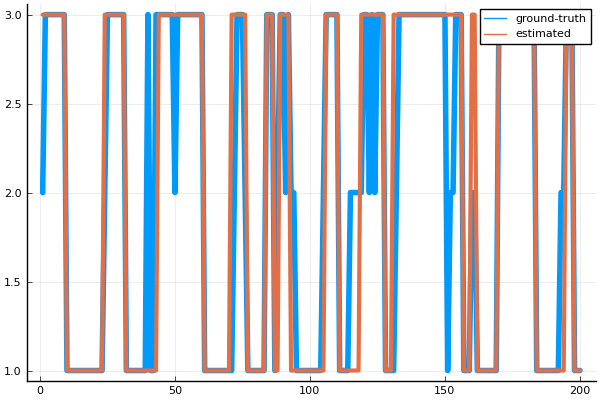

In [80]:
using Plots
pyplot()
plot(state, line=(4), label="ground-truth")
plot!(state_estimated, line=(3), label="estimated", legend=:topright)